In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content/drive/My\ Drive/Colab\ Notebooks/data
# change directory
%pwd  # Ben neredeyim komutu
!ls    # İçerisinde ne var 

/content/drive/My Drive/Colab Notebooks/data
 analyticsDeneme.csv	        productPerformanceReport.csv
 Data_Frame_Raw_Data_v1.csv     productPerformanceReportEng.csv
 Data_Frame_Raw_Data_v2.csv     regression_cagdas_converted.csv
 Data_Frame_Raw_Data_v3.csv     regression_cagdas_converted.gsheet
'Data Frame Raw Data v3.xlsx'   states_all.csv
'Data Frame Raw Data v4.csv'    StudentsPerformance.csv
 EvFiyatlari		        weatherHistory.csv
 fifa.csv		        youtube.csv
 insurance.csv


In [3]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse

%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
import math
#from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sqlalchemy import create_engine
pd.options.display.max_columns = None
pd.options.display.max_rows = None
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
original_data = pd.read_csv("regression_cagdas_converted.csv", encoding='latin1')
data=original_data.copy()
original_data.head()

,Date,Client ID,Source/Medium,Default Channel Grouping,Device Category,Page Views,Sessions,Hour,Min,Sec,Avg. Session Duration,Product Detail Views,Quantity Added To Basket,Quantity Removed From Basket,Product Checkouts,Quantity,Transactions,Revenue
0,01.03.2020,10.047.638.981.574.900.000,google / cpc,Generic Paid Search,desktop,96,3,0,23,49,23.820,62,2,0,14.000,2,2,924.64
1,01.03.2020,10.210.782.261.583.000.000,google / organic,Organic Search,mobile,173,2,0,47,21,47.350,158,6,2,80.000,3,2,377.28
2,01.03.2020,10.264.080.071.583.000.000,google / cpc,Generic Paid Search,mobile,62,8,0,8,6,8.100,40,5,0,19.000,2,2,241.34
3,01.03.2020,10.407.837.351.582.900.000,google / cpc,Generic Paid Search,mobile,18,2,0,5,26,5.430,5,3,2,10.000,2,2,482.84
4,01.03.2020,10.415.602.251.583.000.000,bing / organic,Organic Search,desktop,48,2,0,16,2,16.030,18,2,0,14.000,2,2,1919.04


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4332 entries, 0 to 4331
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Date                          4332 non-null   object 
 1   Client ID                     4332 non-null   object 
 2   Source/Medium                 4332 non-null   object 
 3   Default Channel Grouping      4332 non-null   object 
 4   Device Category               4332 non-null   object 
 5   Page Views                    4332 non-null   int64  
 6   Sessions                      4332 non-null   int64  
 7   Hour                          4332 non-null   int64  
 8   Min                           4332 non-null   int64  
 9   Sec                           4332 non-null   int64  
 10  Avg. Session Duration         4332 non-null   float64
 11  Product Detail Views          4332 non-null   int64  
 12  Quantity Added To Basket      4332 non-null   int64  
 13  Qua

In [6]:
data.describe()

,Page Views,Sessions,Hour,Min,Sec,Avg. Session Duration,Product Detail Views,Quantity Added To Basket,Quantity Removed From Basket,Product Checkouts,Quantity,Transactions
count,4332.000,4332.000,4332.000,4332.000,4332.000,4332.000,4332.000,4332.000,4332.000,4332.000,4332.000,4332.000
mean,50.920,3.394,0.010,12.662,29.958,13.743,39.553,2.741,0.830,17.850,2.400,2.024
std,49.369,2.237,0.098,10.478,17.251,12.110,53.452,3.504,3.344,38.692,2.922,0.343
min,2.000,2.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.000,2.000
25%,22.000,2.000,0.000,5.000,15.000,5.770,10.000,2.000,0.000,6.000,2.000,2.000
50%,37.000,3.000,0.000,10.000,30.000,10.160,24.000,2.000,0.000,10.000,2.000,2.000
75%,62.000,3.000,0.000,17.000,45.000,17.635,48.000,3.000,0.000,16.000,2.000,2.000
max,720.000,27.000,1.000,59.000,59.000,112.230,787.000,83.000,160.000,916.000,109.000,14.000


In [7]:
data['Revenue'] = data['Revenue'].str.replace(r'\D', '').astype(int)
data['Revenue'].describe()

count      4332.000
mean      49701.995
std       74801.965
min         960.000
25%       26869.000
50%       38375.000
75%       57416.000
max     2491339.000
Name: Revenue, dtype: float64

In [8]:
data['Revenue']=data['Revenue']/100 # Noktaları bin ayracı olarak kullandığı için 100 e bölerek asıl revenue metriklerine ulaştık.
data['Revenue'].describe()

count    4332.000
mean      497.020
std       748.020
min         9.600
25%       268.690
50%       383.750
75%       574.160
max     24913.390
Name: Revenue, dtype: float64

In [9]:
Y = data['Revenue']
X = data[['Source/Medium','Default Channel Grouping','Device Category','Page Views','Sessions','Avg. Session Duration','Product Detail Views','Quantity Added To Basket','Quantity Removed From Basket','Product Checkouts','Quantity','Transactions']]
X.head()

,Source/Medium,Default Channel Grouping,Device Category,Page Views,Sessions,Avg. Session Duration,Product Detail Views,Quantity Added To Basket,Quantity Removed From Basket,Product Checkouts,Quantity,Transactions
0,google / cpc,Generic Paid Search,desktop,96,3,23.820,62,2,0,14.000,2,2
1,google / organic,Organic Search,mobile,173,2,47.350,158,6,2,80.000,3,2
2,google / cpc,Generic Paid Search,mobile,62,8,8.100,40,5,0,19.000,2,2
3,google / cpc,Generic Paid Search,mobile,18,2,5.430,5,3,2,10.000,2,2
4,bing / organic,Organic Search,desktop,48,2,16.030,18,2,0,14.000,2,2


In [10]:
X=pd.get_dummies(X,prefix_sep='_',drop_first=True)
X.head()

,Page Views,Sessions,Avg. Session Duration,Product Detail Views,Quantity Added To Basket,Quantity Removed From Basket,Product Checkouts,Quantity,Transactions,Source/Medium_10.1.11.47:15871 / referral,Source/Medium_3dsecure.garanti.com.tr / referral,Source/Medium_basecamp.com / referral,Source/Medium_bing / organic,Source/Medium_boa.kuveytturk.com.tr / referral,Source/Medium_buyma.com / referral,Source/Medium_criteo / retargeting,Source/Medium_digitouch / refferal,Source/Medium_emarsys / email,Source/Medium_facebook / paid-social,Source/Medium_google / cpc,Source/Medium_google / organic,Source/Medium_igshopping / social,Source/Medium_insider / web_push,Source/Medium_instagram.com / referral,Source/Medium_kuponkodlari.com / referral,Source/Medium_l.facebook.com / referral,Source/Medium_l.instagram.com / referral,Source/Medium_lm.facebook.com / referral,Source/Medium_m.facebook.com / referral,Source/Medium_oncecouponatime.com / referral,Source/Medium_r.srvtrck.com / referral,Source/Medium_sneakscloud.com / referral,Source/Medium_t.co / referral,Source/Medium_tr.search.yahoo.com / organic,Source/Medium_yahoo / organic,Source/Medium_yandex / organic,Source/Medium_yandex.com / referral,Source/Medium_yandex.com.tr / organic,Source/Medium_yemeksepeti.com / referral,Default Channel Grouping_Affiliates,Default Channel Grouping_Branded Paid Search,Default Channel Grouping_Conversion Optimization Tools,Default Channel Grouping_Direct,Default Channel Grouping_Display,Default Channel Grouping_Email,Default Channel Grouping_Generic Paid Search,Default Channel Grouping_Organic Search,Default Channel Grouping_Paid Search,Default Channel Grouping_Referral,Default Channel Grouping_Social,Device Category_mobile,Device Category_tablet
0,96,3,23.820,62,2,0,14.000,2,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,173,2,47.350,158,6,2,80.000,3,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,62,8,8.100,40,5,0,19.000,2,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,18,2,5.430,5,3,2,10.000,2,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,48,2,16.030,18,2,0,14.000,2,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print("Eğitim kümesindeki gözlem sayısı : {}".format(X_train.shape[0]))
print("Test kümesindeki gözlem sayısı   : {}".format(X_test.shape[0]))

Eğitim kümesindeki gözlem sayısı : 3465
Test kümesindeki gözlem sayısı   : 867


In [12]:
X = sm.add_constant(X)

In [13]:
X_train = sm.add_constant(X_train)

sonuclar = sm.OLS(y_train, X_train).fit()

sonuclar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Revenue   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     62.93
Date:                Thu, 02 Jul 2020   Prob (F-statistic):               0.00
Time:                        15:08:37   Log-Likelihood:                -26671.
No. Observations:                3465   AIC:                         5.343e+04
Df Residuals:                    3420   BIC:                         5.371e+04
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                  -1072.2066     70.737    -15.158      0.000   -1210.897    -933.516
Page Views                                                 5.2137      0.421     12.392      0.000       4.389       6.039
Sessions                                                  14.5626      5.071      2.872      0.004       4.620      24.505
Avg. Session Duration                                      0.0725      1.000      0.073      0.942      -1.888       2.033
Product Detail Views                                      -4.2273      0.332    -12.715      0.000      -4.879      -3.575
Quantity Added To Basket                                  50.3844      5.420      9.296      0.000      39.757      61.011
Quantity Removed From Basket                             -33.9289      3.047    -11.135      0.000     -39.903     -27.955
Product Checkouts                                          0.0925      0.381      0.243      0.808      -0.654       0.839
Quantity                                                  69.7144      4.069     17.131      0.000      61.736      77.693
Transactions                                             666.5684     35.056     19.014      0.000     597.835     735.301
Source/Medium_10.1.11.47:15871 / referral                397.2611    505.042      0.787      0.432    -592.954    1387.476
Source/Medium_3dsecure.garanti.com.tr / referral          56.8600    505.073      0.113      0.910    -933.415    1047.135
Source/Medium_basecamp.com / referral                     42.5862    506.607      0.084      0.933    -950.696    1035.868
Source/Medium_bing / organic                             251.0150    236.376      1.062      0.288    -212.438     714.468
Source/Medium_boa.kuveytturk.com.tr / referral           -36.5438    368.131     -0.099      0.921    -758.322     685.234
Source/Medium_buyma.com / referral                       396.4790    505.006      0.785      0.432    -593.665    1386.623
Source/Medium_criteo / retargeting                      -187.5222    129.325     -1.450      0.147    -441.084      66.040
Source/Medium_digitouch / refferal                      -105.0419     26.035     -4.035      0.000    -156.087     -53.997
Source/Medium_emarsys / email                            -85.6085     26.138     -3.275      0.001    -136.856     -34.361
Source/Medium_facebook / paid-social                    -279.8769     84.397     -3.316      0.001    -445.351    -114.403
Source/Medium_google / cpc                               -90.7405     78.972     -1.149      0.251    -245.578      64.097
Source/Medium_google / organic                          -112.6854    124.027     -0.909      0.364    -355.859     130.489
Source/M

In [14]:
Y = data['Revenue']
X = data[['Default Channel Grouping','Device Category','Page Views','Sessions','Avg. Session Duration','Product Detail Views','Quantity Added To Basket','Quantity Removed From Basket','Product Checkouts','Transactions']]
X.head()

,Default Channel Grouping,Device Category,Page Views,Sessions,Avg. Session Duration,Product Detail Views,Quantity Added To Basket,Quantity Removed From Basket,Product Checkouts,Transactions
0,Generic Paid Search,desktop,96,3,23.820,62,2,0,14.000,2
1,Organic Search,mobile,173,2,47.350,158,6,2,80.000,2
2,Generic Paid Search,mobile,62,8,8.100,40,5,0,19.000,2
3,Generic Paid Search,mobile,18,2,5.430,5,3,2,10.000,2
4,Organic Search,desktop,48,2,16.030,18,2,0,14.000,2


In [15]:
X=pd.get_dummies(X,prefix_sep='_',drop_first=True)
X.head()

,Page Views,Sessions,Avg. Session Duration,Product Detail Views,Quantity Added To Basket,Quantity Removed From Basket,Product Checkouts,Transactions,Default Channel Grouping_Affiliates,Default Channel Grouping_Branded Paid Search,Default Channel Grouping_Conversion Optimization Tools,Default Channel Grouping_Direct,Default Channel Grouping_Display,Default Channel Grouping_Email,Default Channel Grouping_Generic Paid Search,Default Channel Grouping_Organic Search,Default Channel Grouping_Paid Search,Default Channel Grouping_Referral,Default Channel Grouping_Social,Device Category_mobile,Device Category_tablet
0,96,3,23.820,62,2,0,14.000,2,0,0,0,0,0,0,1,0,0,0,0,0,0
1,173,2,47.350,158,6,2,80.000,2,0,0,0,0,0,0,0,1,0,0,0,1,0
2,62,8,8.100,40,5,0,19.000,2,0,0,0,0,0,0,1,0,0,0,0,1,0
3,18,2,5.430,5,3,2,10.000,2,0,0,0,0,0,0,1,0,0,0,0,1,0
4,48,2,16.030,18,2,0,14.000,2,0,0,0,0,0,0,0,1,0,0,0,0,0


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print("Eğitim kümesindeki gözlem sayısı : {}".format(X_train.shape[0]))
print("Test kümesindeki gözlem sayısı   : {}".format(X_test.shape[0]))

Eğitim kümesindeki gözlem sayısı : 3465
Test kümesindeki gözlem sayısı   : 867


In [17]:
X = sm.add_constant(X)

In [18]:
X_train = sm.add_constant(X_train)

sonuclar = sm.OLS(y_train, X_train).fit()

sonuclar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Revenue   R-squared:                       0.393
Model:                            OLS   Adj. R-squared:                  0.389
Method:                 Least Squares   F-statistic:                     105.9
Date:                Thu, 02 Jul 2020   Prob (F-statistic):               0.00
Time:                        15:08:37   Log-Likelihood:                -26835.
No. Observations:                3465   AIC:                         5.371e+04
Df Residuals:                    3443   BIC:                         5.385e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                  -1357.4863    116.448    -11.657      0.000   -1585.800   -1129.172
Page Views                                                 5.1643      0.438     11.792      0.000       4.306       6.023
Sessions                                                  12.6335      5.281      2.392      0.017       2.279      22.988
Avg. Session Duration                                     -0.5613      1.039     -0.540      0.589      -2.598       1.475
Product Detail Views                                      -4.4751      0.345    -12.972      0.000      -5.151      -3.799
Quantity Added To Basket                                  89.3932      5.128     17.433      0.000      79.339      99.447
Quantity Removed From Basket                             -28.2378      3.163     -8.927      0.000     -34.440     -22.036
Product Checkouts                                         -0.5201      0.392     -1.325      0.185      -1.290       0.249
Transactions                                             718.3936     36.364     19.756      0.000     647.097     789.690
Default Channel Grouping_Affiliates                      108.6270    100.868      1.077      0.282     -89.140     306.394
Default Channel Grouping_Branded Paid Search              46.2828     94.558      0.489      0.625    -139.113     231.679
Default Channel Grouping_Conversion Optimization Tools   976.6366    233.327      4.186      0.000     519.163    1434.110
Default Channel Grouping_Direct                          102.9939     98.423      1.046      0.295     -89.979     295.967
Default Channel Grouping_Display                         129.9206    105.294      1.234      0.217     -76.525     336.366
Default Channel Grouping_Email                           186.0851    100.550      1.851      0.064     -11.058     383.228
Default Channel Grouping_Generic Paid Search              70.5111     92.554      0.762      0.446    -110.956     251.978
Default Channel Grouping_Organic Search                   57.1292     93.271      0.613      0.540    -125.743     240.002
Default Channel Grouping_Paid Search                     189.7723    294.857      0.644      0.520    -388.340     767.885
Default Channel Grouping_Referral                        -97.7210    137.867     -0.709      0.478    -368.030     172.588
Default Channel Grouping_Social                          168.1544    199.314      0.844      0.399    -222.631     558.940
Device Category_mobile                                   -12.2225     21.709     -0.563      0.573     -54.786      30.341
Device Category_tablet                                   -75.2292    126.962     -0.593      0.554    -324.158     173.700
========

In [19]:
Y = data['Revenue']
X = data[['Default Channel Grouping','Device Category','Page Views','Sessions','Product Detail Views','Quantity Added To Basket','Quantity Removed From Basket','Product Checkouts','Transactions']]
X.head()

,Default Channel Grouping,Device Category,Page Views,Sessions,Product Detail Views,Quantity Added To Basket,Quantity Removed From Basket,Product Checkouts,Transactions
0,Generic Paid Search,desktop,96,3,62,2,0,14.000,2
1,Organic Search,mobile,173,2,158,6,2,80.000,2
2,Generic Paid Search,mobile,62,8,40,5,0,19.000,2
3,Generic Paid Search,mobile,18,2,5,3,2,10.000,2
4,Organic Search,desktop,48,2,18,2,0,14.000,2


In [20]:
X=pd.get_dummies(X,prefix_sep='_',drop_first=True)
X.head()

,Page Views,Sessions,Product Detail Views,Quantity Added To Basket,Quantity Removed From Basket,Product Checkouts,Transactions,Default Channel Grouping_Affiliates,Default Channel Grouping_Branded Paid Search,Default Channel Grouping_Conversion Optimization Tools,Default Channel Grouping_Direct,Default Channel Grouping_Display,Default Channel Grouping_Email,Default Channel Grouping_Generic Paid Search,Default Channel Grouping_Organic Search,Default Channel Grouping_Paid Search,Default Channel Grouping_Referral,Default Channel Grouping_Social,Device Category_mobile,Device Category_tablet
0,96,3,62,2,0,14.000,2,0,0,0,0,0,0,1,0,0,0,0,0,0
1,173,2,158,6,2,80.000,2,0,0,0,0,0,0,0,1,0,0,0,1,0
2,62,8,40,5,0,19.000,2,0,0,0,0,0,0,1,0,0,0,0,1,0
3,18,2,5,3,2,10.000,2,0,0,0,0,0,0,1,0,0,0,0,1,0
4,48,2,18,2,0,14.000,2,0,0,0,0,0,0,0,1,0,0,0,0,0


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print("Eğitim kümesindeki gözlem sayısı : {}".format(X_train.shape[0]))
print("Test kümesindeki gözlem sayısı   : {}".format(X_test.shape[0]))

Eğitim kümesindeki gözlem sayısı : 3465
Test kümesindeki gözlem sayısı   : 867


In [22]:
X = sm.add_constant(X)

In [23]:
X_train = sm.add_constant(X_train)

sonuclar = sm.OLS(y_train, X_train).fit()

sonuclar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Revenue   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.389
Method:                 Least Squares   F-statistic:                     111.2
Date:                Thu, 02 Jul 2020   Prob (F-statistic):               0.00
Time:                        15:08:37   Log-Likelihood:                -26835.
No. Observations:                3465   AIC:                         5.371e+04
Df Residuals:                    3444   BIC:                         5.384e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                  -1367.3322    115.001    -11.890      0.000   -1592.810   -1141.854
Page Views                                                 5.0820      0.411     12.379      0.000       4.277       5.887
Sessions                                                  13.8983      4.733      2.936      0.003       4.618      23.179
Product Detail Views                                      -4.4870      0.344    -13.035      0.000      -5.162      -3.812
Quantity Added To Basket                                  89.4335      5.127     17.444      0.000      79.382      99.485
Quantity Removed From Basket                             -28.2404      3.163     -8.929      0.000     -34.442     -22.039
Product Checkouts                                         -0.5203      0.392     -1.326      0.185      -1.290       0.249
Transactions                                             719.3437     36.317     19.807      0.000     648.138     790.549
Default Channel Grouping_Affiliates                      108.8859    100.856      1.080      0.280     -88.858     306.630
Default Channel Grouping_Branded Paid Search              47.0127     94.539      0.497      0.619    -138.346     232.371
Default Channel Grouping_Conversion Optimization Tools   970.9617    233.067      4.166      0.000     513.999    1427.924
Default Channel Grouping_Direct                          102.9797     98.413      1.046      0.295     -89.973     295.933
Default Channel Grouping_Display                         130.3366    105.281      1.238      0.216     -76.082     336.756
Default Channel Grouping_Email                           186.7835    100.531      1.858      0.063     -10.323     383.890
Default Channel Grouping_Generic Paid Search              70.6618     92.544      0.764      0.445    -110.786     252.109
Default Channel Grouping_Organic Search                   57.4548     93.260      0.616      0.538    -125.395     240.305
Default Channel Grouping_Paid Search                     191.0756    294.817      0.648      0.517    -386.958     769.109
Default Channel Grouping_Referral                        -97.1947    137.849     -0.705      0.481    -367.469     173.079
Default Channel Grouping_Social                          166.9775    199.282      0.838      0.402    -223.745     557.700
Device Category_mobile                                   -11.8806     21.698     -0.548      0.584     -54.422      30.661
Device Category_tablet                                   -76.1303    126.938     -0.600      0.549    -325.012     172.752
==============================================================================
Omnibus:                     4897.997   Durbin-Watso

In [24]:
def pd_kategorize_et(kanal):
    if kanal == 'Direct':
        return 'Direct'
    elif kanal == 'Display':
        return 'Display'
    elif kanal == 'Email':
        return 'Email'
    elif kanal == 'Generic Paid Search':
        return 'Paid Search'
    elif kanal == 'Paid Search':
        return 'Paid Search'
    elif kanal == 'Organic Search':
        return 'Organic Search'
    else:
        return 'OtherChannel'

In [25]:
data['Default Channel Grouping'] = data['Default Channel Grouping'].apply(pd_kategorize_et)
data.head()

,Date,Client ID,Source/Medium,Default Channel Grouping,Device Category,Page Views,Sessions,Hour,Min,Sec,Avg. Session Duration,Product Detail Views,Quantity Added To Basket,Quantity Removed From Basket,Product Checkouts,Quantity,Transactions,Revenue
0,01.03.2020,10.047.638.981.574.900.000,google / cpc,Paid Search,desktop,96,3,0,23,49,23.820,62,2,0,14.000,2,2,924.640
1,01.03.2020,10.210.782.261.583.000.000,google / organic,Organic Search,mobile,173,2,0,47,21,47.350,158,6,2,80.000,3,2,377.280
2,01.03.2020,10.264.080.071.583.000.000,google / cpc,Paid Search,mobile,62,8,0,8,6,8.100,40,5,0,19.000,2,2,241.340
3,01.03.2020,10.407.837.351.582.900.000,google / cpc,Paid Search,mobile,18,2,0,5,26,5.430,5,3,2,10.000,2,2,482.840
4,01.03.2020,10.415.602.251.583.000.000,bing / organic,Organic Search,desktop,48,2,0,16,2,16.030,18,2,0,14.000,2,2,1919.040


In [26]:
data['Default Channel Grouping'].unique()

array(['Paid Search', 'Organic Search', 'Email', 'OtherChannel', 'Direct',
       'Display'], dtype=object)

In [27]:
Y = data['Revenue']
X = data[['Default Channel Grouping','Device Category','Page Views','Sessions','Product Detail Views','Quantity Added To Basket','Quantity Removed From Basket','Product Checkouts','Transactions']]
X.head()

,Default Channel Grouping,Device Category,Page Views,Sessions,Product Detail Views,Quantity Added To Basket,Quantity Removed From Basket,Product Checkouts,Transactions
0,Paid Search,desktop,96,3,62,2,0,14.000,2
1,Organic Search,mobile,173,2,158,6,2,80.000,2
2,Paid Search,mobile,62,8,40,5,0,19.000,2
3,Paid Search,mobile,18,2,5,3,2,10.000,2
4,Organic Search,desktop,48,2,18,2,0,14.000,2


In [28]:
X=pd.get_dummies(X,prefix_sep='_') #,drop_first=True? şimdilik dursun
X.head()

,Page Views,Sessions,Product Detail Views,Quantity Added To Basket,Quantity Removed From Basket,Product Checkouts,Transactions,Default Channel Grouping_Direct,Default Channel Grouping_Display,Default Channel Grouping_Email,Default Channel Grouping_Organic Search,Default Channel Grouping_OtherChannel,Default Channel Grouping_Paid Search,Device Category_desktop,Device Category_mobile,Device Category_tablet
0,96,3,62,2,0,14.000,2,0,0,0,0,0,1,1,0,0
1,173,2,158,6,2,80.000,2,0,0,0,1,0,0,0,1,0
2,62,8,40,5,0,19.000,2,0,0,0,0,0,1,0,1,0
3,18,2,5,3,2,10.000,2,0,0,0,0,0,1,0,1,0
4,48,2,18,2,0,14.000,2,0,0,0,1,0,0,1,0,0


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print("Eğitim kümesindeki gözlem sayısı : {}".format(X_train.shape[0]))
print("Test kümesindeki gözlem sayısı   : {}".format(X_test.shape[0]))

Eğitim kümesindeki gözlem sayısı : 3465
Test kümesindeki gözlem sayısı   : 867


In [30]:
X = sm.add_constant(X)

In [31]:
X_train = sm.add_constant(X_train)

sonuclar = sm.OLS(y_train, X_train).fit()

sonuclar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Revenue   R-squared:                       0.388
Model:                            OLS   Adj. R-squared:                  0.386
Method:                 Least Squares   F-statistic:                     156.5
Date:                Thu, 02 Jul 2020   Prob (F-statistic):               0.00
Time:                        15:08:37   Log-Likelihood:                -26847.
No. Observations:                3465   AIC:                         5.372e+04
Df Residuals:                    3450   BIC:                         5.382e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                    -864.9260     54.237    -15.947      0.000    -971.266    -758.586
Page Views                                  4.9713      0.411     12.109      0.000       4.166       5.776
Sessions                                   14.8751      4.735      3.141      0.002       5.591      24.159
Product Detail Views                       -4.4897      0.344    -13.042      0.000      -5.165      -3.815
Quantity Added To Basket                   88.2160      5.122     17.223      0.000      78.173      98.259
Quantity Removed From Basket              -28.3043      3.167     -8.938      0.000     -34.513     -22.095
Product Checkouts                          -0.2386      0.387     -0.617      0.538      -0.997       0.520
Transactions                              719.3347     36.400     19.762      0.000     647.966     790.703
Default Channel Grouping_Direct          -143.2556     35.319     -4.056      0.000    -212.504     -74.007
Default Channel Grouping_Display         -115.4420     46.727     -2.471      0.014    -207.057     -23.827
Default Channel Grouping_Email            -60.6280     38.772     -1.564      0.118    -136.646      15.390
Default Channel Grouping_Organic Search  -187.4983     22.529     -8.323      0.000    -231.669    -143.327
Default Channel Grouping_OtherChannel    -182.7463     22.813     -8.011      0.000    -227.474    -138.019
Default Channel Grouping_Paid Search     -175.3557     20.953     -8.369      0.000    -216.438    -134.274
Device Category_desktop                  -256.6873     38.711     -6.631      0.000    -332.586    -180.789
Device Category_mobile                   -266.7879     37.563     -7.102      0.000    -340.436    -193.140
Device Category_tablet                   -341.4508     94.497     -3.613      0.000    -526.727    -156.175
==============================================================================
Omnibus:                     4912.086   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          6352894.955
Skew:                           7.656   Prob(JB):                         0.00
Kurtosis:                     212.209   Cond. No.                     1.53e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.43e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [32]:
def pd_kategorize_et(kanal):
    if kanal == 'Direct':
        return 'Direct'
    elif kanal == 'Display':
        return 'Display'
    elif kanal == 'Generic Paid Search':
        return 'Paid Search'
    elif kanal == 'Paid Search':
        return 'Paid Search'
    elif kanal == 'Organic Search':
        return 'Organic Search'
    else:
        return 'OtherChannel'

In [33]:
data['Default Channel Grouping'] = data['Default Channel Grouping'].apply(pd_kategorize_et)
data['Default Channel Grouping'].unique()

array(['Paid Search', 'Organic Search', 'OtherChannel', 'Direct',
       'Display'], dtype=object)

In [34]:
Y = data['Revenue']
X = data[['Default Channel Grouping','Device Category','Page Views','Sessions','Product Detail Views','Quantity Added To Basket','Quantity Removed From Basket','Transactions']]
X.head()

,Default Channel Grouping,Device Category,Page Views,Sessions,Product Detail Views,Quantity Added To Basket,Quantity Removed From Basket,Transactions
0,Paid Search,desktop,96,3,62,2,0,2
1,Organic Search,mobile,173,2,158,6,2,2
2,Paid Search,mobile,62,8,40,5,0,2
3,Paid Search,mobile,18,2,5,3,2,2
4,Organic Search,desktop,48,2,18,2,0,2


In [35]:
X=pd.get_dummies(X,prefix_sep='_') #,drop_first=True? şimdilik dursun
X.head()

,Page Views,Sessions,Product Detail Views,Quantity Added To Basket,Quantity Removed From Basket,Transactions,Default Channel Grouping_Direct,Default Channel Grouping_Display,Default Channel Grouping_Organic Search,Default Channel Grouping_OtherChannel,Default Channel Grouping_Paid Search,Device Category_desktop,Device Category_mobile,Device Category_tablet
0,96,3,62,2,0,2,0,0,0,0,1,1,0,0
1,173,2,158,6,2,2,0,0,1,0,0,0,1,0
2,62,8,40,5,0,2,0,0,0,0,1,0,1,0
3,18,2,5,3,2,2,0,0,0,0,1,0,1,0
4,48,2,18,2,0,2,0,0,1,0,0,1,0,0


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print("Eğitim kümesindeki gözlem sayısı : {}".format(X_train.shape[0]))
print("Test kümesindeki gözlem sayısı   : {}".format(X_test.shape[0]))

Eğitim kümesindeki gözlem sayısı : 3465
Test kümesindeki gözlem sayısı   : 867


In [37]:
X = sm.add_constant(X)

In [38]:
X_train = sm.add_constant(X_train)

sonuclar = sm.OLS(y_train, X_train).fit()

sonuclar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Revenue   R-squared:                       0.387
Model:                            OLS   Adj. R-squared:                  0.385
Method:                 Least Squares   F-statistic:                     181.8
Date:                Thu, 02 Jul 2020   Prob (F-statistic):               0.00
Time:                        15:08:38   Log-Likelihood:                -26850.
No. Observations:                3465   AIC:                         5.373e+04
Df Residuals:                    3452   BIC:                         5.381e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                    -856.4974     53.137    -16.119      0.000    -960.680    -752.315
Page Views                                  4.9443      0.408     12.121      0.000       4.145       5.744
Sessions                                   14.6687      4.733      3.099      0.002       5.389      23.949
Product Detail Views                       -4.5197      0.343    -13.161      0.000      -5.193      -3.846
Quantity Added To Basket                   85.9659      4.591     18.724      0.000      76.964      94.968
Quantity Removed From Basket              -28.2334      3.165     -8.919      0.000     -34.440     -22.027
Transactions                              722.1969     36.396     19.843      0.000     650.837     793.557
Default Channel Grouping_Direct          -158.9163     34.785     -4.569      0.000    -227.117     -90.715
Default Channel Grouping_Display         -130.3722     45.545     -2.863      0.004    -219.670     -41.075
Default Channel Grouping_Organic Search  -202.1507     22.755     -8.884      0.000    -246.766    -157.536
Default Channel Grouping_OtherChannel    -175.6220     21.910     -8.016      0.000    -218.580    -132.664
Default Channel Grouping_Paid Search     -189.4362     21.353     -8.872      0.000    -231.302    -147.570
Device Category_desktop                  -252.9308     38.756     -6.526      0.000    -328.917    -176.944
Device Category_mobile                   -260.0896     37.639     -6.910      0.000    -333.887    -186.293
Device Category_tablet                   -343.4770     94.246     -3.644      0.000    -528.260    -158.694
==============================================================================
Omnibus:                     4921.007   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          6437279.084
Skew:                           7.680   Prob(JB):                         0.00
Kurtosis:                     213.597   Cond. No.                     5.55e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is  1e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [39]:
data2=original_data.copy()
data2.head()

,Date,Client ID,Source/Medium,Default Channel Grouping,Device Category,Page Views,Sessions,Hour,Min,Sec,Avg. Session Duration,Product Detail Views,Quantity Added To Basket,Quantity Removed From Basket,Product Checkouts,Quantity,Transactions,Revenue
0,01.03.2020,10.047.638.981.574.900.000,google / cpc,Generic Paid Search,desktop,96,3,0,23,49,23.820,62,2,0,14.000,2,2,924.64
1,01.03.2020,10.210.782.261.583.000.000,google / organic,Organic Search,mobile,173,2,0,47,21,47.350,158,6,2,80.000,3,2,377.28
2,01.03.2020,10.264.080.071.583.000.000,google / cpc,Generic Paid Search,mobile,62,8,0,8,6,8.100,40,5,0,19.000,2,2,241.34
3,01.03.2020,10.407.837.351.582.900.000,google / cpc,Generic Paid Search,mobile,18,2,0,5,26,5.430,5,3,2,10.000,2,2,482.84
4,01.03.2020,10.415.602.251.583.000.000,bing / organic,Organic Search,desktop,48,2,0,16,2,16.030,18,2,0,14.000,2,2,1919.04


In [40]:
data2.describe()

,Page Views,Sessions,Hour,Min,Sec,Avg. Session Duration,Product Detail Views,Quantity Added To Basket,Quantity Removed From Basket,Product Checkouts,Quantity,Transactions
count,4332.000,4332.000,4332.000,4332.000,4332.000,4332.000,4332.000,4332.000,4332.000,4332.000,4332.000,4332.000
mean,50.920,3.394,0.010,12.662,29.958,13.743,39.553,2.741,0.830,17.850,2.400,2.024
std,49.369,2.237,0.098,10.478,17.251,12.110,53.452,3.504,3.344,38.692,2.922,0.343
min,2.000,2.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.000,2.000
25%,22.000,2.000,0.000,5.000,15.000,5.770,10.000,2.000,0.000,6.000,2.000,2.000
50%,37.000,3.000,0.000,10.000,30.000,10.160,24.000,2.000,0.000,10.000,2.000,2.000
75%,62.000,3.000,0.000,17.000,45.000,17.635,48.000,3.000,0.000,16.000,2.000,2.000
max,720.000,27.000,1.000,59.000,59.000,112.230,787.000,83.000,160.000,916.000,109.000,14.000


In [41]:
data2['Revenue'] = data2['Revenue'].str.replace(r'\D', '').astype(int)
data2['Revenue'].describe()

count      4332.000
mean      49701.995
std       74801.965
min         960.000
25%       26869.000
50%       38375.000
75%       57416.000
max     2491339.000
Name: Revenue, dtype: float64

In [42]:
data2['Revenue'] = data2['Revenue']/100

In [43]:
data2['Revenue'].describe()

count    4332.000
mean      497.020
std       748.020
min         9.600
25%       268.690
50%       383.750
75%       574.160
max     24913.390
Name: Revenue, dtype: float64

In [44]:
data2['Default Channel Grouping'] = data2['Default Channel Grouping'].apply(pd_kategorize_et)
data2['Default Channel Grouping'].unique()

array(['Paid Search', 'Organic Search', 'OtherChannel', 'Direct',
       'Display'], dtype=object)

In [45]:
data2['EnhancedRate']=(data2['Quantity Added To Basket']*data2['Product Detail Views']*data2['Product Checkouts'])
data2['avgOrderAmount']=data['Revenue']/data2['Transactions']
data2.head()

,Date,Client ID,Source/Medium,Default Channel Grouping,Device Category,Page Views,Sessions,Hour,Min,Sec,Avg. Session Duration,Product Detail Views,Quantity Added To Basket,Quantity Removed From Basket,Product Checkouts,Quantity,Transactions,Revenue,EnhancedRate,avgOrderAmount
0,01.03.2020,10.047.638.981.574.900.000,google / cpc,Paid Search,desktop,96,3,0,23,49,23.820,62,2,0,14.000,2,2,924.640,1736.000,462.320
1,01.03.2020,10.210.782.261.583.000.000,google / organic,Organic Search,mobile,173,2,0,47,21,47.350,158,6,2,80.000,3,2,377.280,75840.000,188.640
2,01.03.2020,10.264.080.071.583.000.000,google / cpc,Paid Search,mobile,62,8,0,8,6,8.100,40,5,0,19.000,2,2,241.340,3800.000,120.670
3,01.03.2020,10.407.837.351.582.900.000,google / cpc,Paid Search,mobile,18,2,0,5,26,5.430,5,3,2,10.000,2,2,482.840,150.000,241.420
4,01.03.2020,10.415.602.251.583.000.000,bing / organic,Organic Search,desktop,48,2,0,16,2,16.030,18,2,0,14.000,2,2,1919.040,504.000,959.520


In [46]:
data2.corr()

,Page Views,Sessions,Hour,Min,Sec,Avg. Session Duration,Product Detail Views,Quantity Added To Basket,Quantity Removed From Basket,Product Checkouts,Quantity,Transactions,Revenue,EnhancedRate,avgOrderAmount
Page Views,1.000,0.294,0.255,0.458,0.010,0.520,0.826,0.511,0.289,0.522,0.267,0.328,0.338,0.336,0.234
Sessions,0.294,1.000,-0.044,-0.222,-0.007,-0.214,0.241,0.177,0.078,0.146,0.095,0.123,0.159,0.080,0.114
Hour,0.255,-0.044,1.000,0.018,-0.012,0.501,0.256,0.130,0.102,0.191,0.047,0.096,0.041,0.176,0.052
Min,0.458,-0.222,0.018,1.000,-0.001,0.874,0.381,0.218,0.134,0.229,0.093,0.068,0.108,0.091,0.110
Sec,0.010,-0.007,-0.012,-0.001,1.000,0.017,0.010,0.002,-0.002,0.005,-0.010,0.026,-0.001,0.001,-0.024
Avg. Session Duration,0.520,-0.214,0.501,0.874,0.017,1.000,0.454,0.252,0.165,0.291,0.103,0.106,0.114,0.164,0.120
Product Detail Views,0.826,0.241,0.256,0.381,0.010,0.454,1.000,0.447,0.269,0.479,0.183,0.129,0.152,0.358,0.142
Quantity Added To Basket,0.511,0.177,0.130,0.218,0.002,0.252,0.447,1.000,0.508,0.718,0.643,0.444,0.541,0.655,0.444
Quantity Removed From Basket,0.289,0.078,0.102,0.134,-0.002,0.165,0.269,0.508,1.000,0.442,0.330,0.136,0.112,0.283,0.100
Product Checkouts,0.522,0.146,0.191,0.229,0.005,0.291,0.479,0.718,0.442,1.000,0.400,0.252,0.363,0.718,0.374


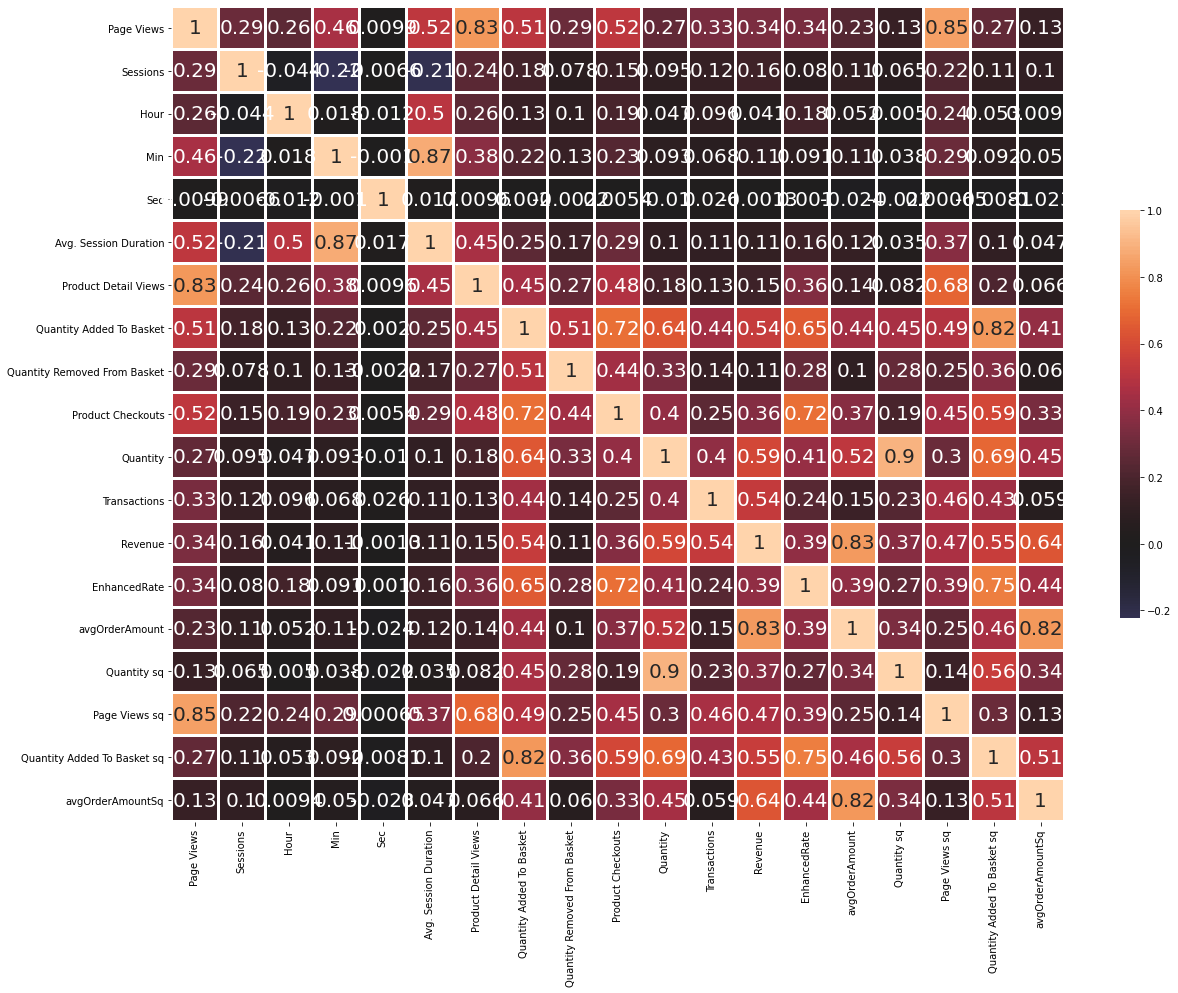

In [66]:
plt.subplots(figsize=(20,15))
sns.heatmap(data2.corr(),vmax=1, center=0,linewidths=2,annot_kws={'size':20},square=False, cbar_kws={"shrink": 0.5},annot=True)

In [48]:
data2['Quantity sq']=data2['Quantity']**2
data2['Page Views sq']=data2['Page Views']**2
data2['Quantity Added To Basket sq']=data2['Quantity Added To Basket']**2
data2.head()

,Date,Client ID,Source/Medium,Default Channel Grouping,Device Category,Page Views,Sessions,Hour,Min,Sec,Avg. Session Duration,Product Detail Views,Quantity Added To Basket,Quantity Removed From Basket,Product Checkouts,Quantity,Transactions,Revenue,EnhancedRate,avgOrderAmount,Quantity sq,Page Views sq,Quantity Added To Basket sq
0,01.03.2020,10.047.638.981.574.900.000,google / cpc,Paid Search,desktop,96,3,0,23,49,23.820,62,2,0,14.000,2,2,924.640,1736.000,462.320,4,9216,4
1,01.03.2020,10.210.782.261.583.000.000,google / organic,Organic Search,mobile,173,2,0,47,21,47.350,158,6,2,80.000,3,2,377.280,75840.000,188.640,9,29929,36
2,01.03.2020,10.264.080.071.583.000.000,google / cpc,Paid Search,mobile,62,8,0,8,6,8.100,40,5,0,19.000,2,2,241.340,3800.000,120.670,4,3844,25
3,01.03.2020,10.407.837.351.582.900.000,google / cpc,Paid Search,mobile,18,2,0,5,26,5.430,5,3,2,10.000,2,2,482.840,150.000,241.420,4,324,9
4,01.03.2020,10.415.602.251.583.000.000,bing / organic,Organic Search,desktop,48,2,0,16,2,16.030,18,2,0,14.000,2,2,1919.040,504.000,959.520,4,2304,4


In [49]:
data2.corr()

,Page Views,Sessions,Hour,Min,Sec,Avg. Session Duration,Product Detail Views,Quantity Added To Basket,Quantity Removed From Basket,Product Checkouts,Quantity,Transactions,Revenue,EnhancedRate,avgOrderAmount,Quantity sq,Page Views sq,Quantity Added To Basket sq
Page Views,1.000,0.294,0.255,0.458,0.010,0.520,0.826,0.511,0.289,0.522,0.267,0.328,0.338,0.336,0.234,0.130,0.850,0.269
Sessions,0.294,1.000,-0.044,-0.222,-0.007,-0.214,0.241,0.177,0.078,0.146,0.095,0.123,0.159,0.080,0.114,0.065,0.215,0.113
Hour,0.255,-0.044,1.000,0.018,-0.012,0.501,0.256,0.130,0.102,0.191,0.047,0.096,0.041,0.176,0.052,0.005,0.242,0.053
Min,0.458,-0.222,0.018,1.000,-0.001,0.874,0.381,0.218,0.134,0.229,0.093,0.068,0.108,0.091,0.110,0.038,0.294,0.092
Sec,0.010,-0.007,-0.012,-0.001,1.000,0.017,0.010,0.002,-0.002,0.005,-0.010,0.026,-0.001,0.001,-0.024,-0.022,0.001,-0.008
Avg. Session Duration,0.520,-0.214,0.501,0.874,0.017,1.000,0.454,0.252,0.165,0.291,0.103,0.106,0.114,0.164,0.120,0.035,0.372,0.105
Product Detail Views,0.826,0.241,0.256,0.381,0.010,0.454,1.000,0.447,0.269,0.479,0.183,0.129,0.152,0.358,0.142,0.082,0.683,0.205
Quantity Added To Basket,0.511,0.177,0.130,0.218,0.002,0.252,0.447,1.000,0.508,0.718,0.643,0.444,0.541,0.655,0.444,0.454,0.485,0.820
Quantity Removed From Basket,0.289,0.078,0.102,0.134,-0.002,0.165,0.269,0.508,1.000,0.442,0.330,0.136,0.112,0.283,0.100,0.283,0.245,0.361
Product Checkouts,0.522,0.146,0.191,0.229,0.005,0.291,0.479,0.718,0.442,1.000,0.400,0.252,0.363,0.718,0.374,0.189,0.451,0.592


In [50]:
Y = data2['Transactions']
X = data2[['Default Channel Grouping','Device Category','Page Views','Sessions','Product Detail Views','Quantity Added To Basket','Quantity Removed From Basket','avgOrderAmount','EnhancedRate','Avg. Session Duration','Quantity sq','Page Views sq','Quantity Added To Basket sq']]

In [51]:
X=pd.get_dummies(X,prefix_sep='_') #,drop_first=True? şimdilik dursun
X.head()

,Page Views,Sessions,Product Detail Views,Quantity Added To Basket,Quantity Removed From Basket,avgOrderAmount,EnhancedRate,Avg. Session Duration,Quantity sq,Page Views sq,Quantity Added To Basket sq,Default Channel Grouping_Direct,Default Channel Grouping_Display,Default Channel Grouping_Organic Search,Default Channel Grouping_OtherChannel,Default Channel Grouping_Paid Search,Device Category_desktop,Device Category_mobile,Device Category_tablet
0,96,3,62,2,0,462.320,1736.000,23.820,4,9216,4,0,0,0,0,1,1,0,0
1,173,2,158,6,2,188.640,75840.000,47.350,9,29929,36,0,0,1,0,0,0,1,0
2,62,8,40,5,0,120.670,3800.000,8.100,4,3844,25,0,0,0,0,1,0,1,0
3,18,2,5,3,2,241.420,150.000,5.430,4,324,9,0,0,0,0,1,0,1,0
4,48,2,18,2,0,959.520,504.000,16.030,4,2304,4,0,0,1,0,0,1,0,0


In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print("Eğitim kümesindeki gözlem sayısı : {}".format(X_train.shape[0]))
print("Test kümesindeki gözlem sayısı   : {}".format(X_test.shape[0]))

Eğitim kümesindeki gözlem sayısı : 3465
Test kümesindeki gözlem sayısı   : 867


In [53]:
X = sm.add_constant(X)

In [54]:
X_train = sm.add_constant(X_train)

sonuclar = sm.OLS(y_train, X_train).fit()

sonuclar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Transactions   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.411
Method:                 Least Squares   F-statistic:                     143.3
Date:                Thu, 02 Jul 2020   Prob (F-statistic):               0.00
Time:                        15:08:40   Log-Likelihood:                 86.715
No. Observations:                3465   AIC:                            -137.4
Df Residuals:                    3447   BIC:                            -26.72
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       1.2928      0.014     92.468      0.000       1.265       1.320
Page Views                                  0.0003      0.000      1.185      0.236      -0.000       0.001
Sessions                                    0.0105      0.002      4.644      0.000       0.006       0.015
Product Detail Views                       -0.0027      0.000    -18.795      0.000      -0.003      -0.002
Quantity Added To Basket                    0.0139      0.003      4.261      0.000       0.008       0.020
Quantity Removed From Basket               -0.0037      0.001     -2.703      0.007      -0.006      -0.001
avgOrderAmount                          -9.071e-05   1.91e-05     -4.750      0.000      -0.000   -5.33e-05
EnhancedRate                            -2.241e-07   2.46e-08     -9.122      0.000   -2.72e-07   -1.76e-07
Avg. Session Duration                       0.0010      0.000      2.288      0.022       0.000       0.002
Quantity sq                                -0.0001   2.49e-05     -4.374      0.000      -0.000      -6e-05
Page Views sq                            1.156e-05   4.77e-07     24.211      0.000    1.06e-05    1.25e-05
Quantity Added To Basket sq                 0.0007      0.000      6.688      0.000       0.001       0.001
Default Channel Grouping_Direct             0.2790      0.014     19.699      0.000       0.251       0.307
Default Channel Grouping_Display            0.2465      0.019     13.059      0.000       0.210       0.284
Default Channel Grouping_Organic Search     0.2540      0.009     28.221      0.000       0.236       0.272
Default Channel Grouping_OtherChannel       0.2528      0.009     29.196      0.000       0.236       0.270
Default Channel Grouping_Paid Search        0.2604      0.008     31.711      0.000       0.244       0.277
Device Category_desktop                     0.4485      0.015     29.755      0.000       0.419       0.478
Device Category_mobile                      0.4308      0.015     29.511      0.000       0.402       0.459
Device Category_tablet                      0.4135      0.039     10.500      0.000       0.336       0.491
==============================================================================
Omnibus:                     7131.982   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         61102244.155
Skew:                          16.577   Prob(JB):                         0.00
Kurtosis:                     652.708   Cond. No.                     1.81e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigen

In [55]:
data2['avgOrderAmountSq']=data2['avgOrderAmount']**2

In [56]:
Y = data2['Revenue']
X = data2[['Default Channel Grouping','Device Category','Page Views','Sessions','Product Detail Views','Quantity Added To Basket','Quantity Removed From Basket',
           'avgOrderAmount','EnhancedRate','Avg. Session Duration','Quantity sq','Page Views sq','Quantity Added To Basket sq','avgOrderAmountSq']]

In [57]:
X=pd.get_dummies(X,prefix_sep='_') #,drop_first=True? şimdilik dursun
X.head()

,Page Views,Sessions,Product Detail Views,Quantity Added To Basket,Quantity Removed From Basket,avgOrderAmount,EnhancedRate,Avg. Session Duration,Quantity sq,Page Views sq,Quantity Added To Basket sq,avgOrderAmountSq,Default Channel Grouping_Direct,Default Channel Grouping_Display,Default Channel Grouping_Organic Search,Default Channel Grouping_OtherChannel,Default Channel Grouping_Paid Search,Device Category_desktop,Device Category_mobile,Device Category_tablet
0,96,3,62,2,0,462.320,1736.000,23.820,4,9216,4,213739.782,0,0,0,0,1,1,0,0
1,173,2,158,6,2,188.640,75840.000,47.350,9,29929,36,35585.050,0,0,1,0,0,0,1,0
2,62,8,40,5,0,120.670,3800.000,8.100,4,3844,25,14561.249,0,0,0,0,1,0,1,0
3,18,2,5,3,2,241.420,150.000,5.430,4,324,9,58283.616,0,0,0,0,1,0,1,0
4,48,2,18,2,0,959.520,504.000,16.030,4,2304,4,920678.630,0,0,1,0,0,1,0,0


In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print("Eğitim kümesindeki gözlem sayısı : {}".format(X_train.shape[0]))
print("Test kümesindeki gözlem sayısı   : {}".format(X_test.shape[0]))

Eğitim kümesindeki gözlem sayısı : 3465
Test kümesindeki gözlem sayısı   : 867


In [59]:
X = sm.add_constant(X)

In [60]:
X_train = sm.add_constant(X_train)

sonuclar = sm.OLS(y_train, X_train).fit()

sonuclar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Revenue   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     1058.
Date:                Thu, 02 Jul 2020   Prob (F-statistic):               0.00
Time:                        15:08:40   Log-Likelihood:                -24449.
No. Observations:                3465   AIC:                         4.894e+04
Df Residuals:                    3446   BIC:                         4.905e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       2.2944     17.155      0.134      0.894     -31.341      35.930
Page Views                                 -1.4348      0.283     -5.065      0.000      -1.990      -0.879
Sessions                                   14.4938      2.693      5.383      0.000       9.214      19.773
Product Detail Views                       -3.0758      0.170    -18.085      0.000      -3.409      -2.742
Quantity Added To Basket                   -4.6041      3.879     -1.187      0.235     -12.210       3.002
Quantity Removed From Basket              -10.8832      1.626     -6.692      0.000     -14.072      -7.695
avgOrderAmount                              2.2560      0.038     59.156      0.000       2.181       2.331
EnhancedRate                               -0.0005   2.93e-05    -15.924      0.000      -0.001      -0.000
Avg. Session Duration                       0.3660      0.532      0.688      0.491      -0.677       1.409
Quantity sq                                -0.2621      0.030     -8.822      0.000      -0.320      -0.204
Page Views sq                               0.0205      0.001     36.105      0.000       0.019       0.022
Quantity Added To Basket sq                 1.9444      0.132     14.683      0.000       1.685       2.204
avgOrderAmountSq                        -2.814e-05   8.69e-06     -3.239      0.001   -4.52e-05   -1.11e-05
Default Channel Grouping_Direct            16.3529     16.844      0.971      0.332     -16.673      49.379
Default Channel Grouping_Display           -6.7587     22.484     -0.301      0.764     -50.842      37.325
Default Channel Grouping_Organic Search   -11.6190     10.761     -1.080      0.280     -32.719       9.481
Default Channel Grouping_OtherChannel     -18.0429     10.386     -1.737      0.082     -38.405       2.320
Default Channel Grouping_Paid Search       22.3622      9.774      2.288      0.022       3.199      41.526
Device Category_desktop                    -3.1666     17.990     -0.176      0.860     -38.439      32.106
Device Category_mobile                     -7.8635     17.412     -0.452      0.652     -42.003      26.276
Device Category_tablet                     13.3246     46.846      0.284      0.776     -78.524     105.173
==============================================================================
Omnibus:                     5368.503   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         37889636.324
Skew:                           8.594   Prob(JB):                         0.00
Kurtosis:                     515.000   Cond. No.                     9.35e+21
==============================================================================

Warnings:
[1] St

In [61]:
Y = data2['Revenue']
X = data2[['Page Views','Sessions','Product Detail Views','Quantity Removed From Basket','avgOrderAmount','EnhancedRate','Quantity sq',
           'Page Views sq','Quantity Added To Basket sq','avgOrderAmountSq']]

In [62]:
X=pd.get_dummies(X,prefix_sep='_') #,drop_first=True? şimdilik dursun
X.head()

,Page Views,Sessions,Product Detail Views,Quantity Removed From Basket,avgOrderAmount,EnhancedRate,Quantity sq,Page Views sq,Quantity Added To Basket sq,avgOrderAmountSq
0,96,3,62,0,462.320,1736.000,4,9216,4,213739.782
1,173,2,158,2,188.640,75840.000,9,29929,36,35585.050
2,62,8,40,0,120.670,3800.000,4,3844,25,14561.249
3,18,2,5,2,241.420,150.000,4,324,9,58283.616
4,48,2,18,0,959.520,504.000,4,2304,4,920678.630


In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print("Eğitim kümesindeki gözlem sayısı : {}".format(X_train.shape[0]))
print("Test kümesindeki gözlem sayısı   : {}".format(X_test.shape[0]))

Eğitim kümesindeki gözlem sayısı : 3465
Test kümesindeki gözlem sayısı   : 867


In [64]:
X = sm.add_constant(X)

In [65]:
X_train = sm.add_constant(X_train)

sonuclar = sm.OLS(y_train, X_train).fit()

sonuclar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Revenue   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     1900.
Date:                Thu, 02 Jul 2020   Prob (F-statistic):               0.00
Time:                        15:08:40   Log-Likelihood:                -24455.
No. Observations:                3465   AIC:                         4.893e+04
Df Residuals:                    3454   BIC:                         4.900e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -0.3690     13.057     -0.028      0.977     -25.969      25.231
Page Views                      -1.6429      0.245     -6.700      0.000      -2.124      -1.162
Sessions                        15.1257      2.287      6.613      0.000      10.641      19.611
Product Detail Views            -2.9933      0.165    -18.095      0.000      -3.318      -2.669
Quantity Removed From Basket   -11.6003      1.535     -7.555      0.000     -14.611      -8.590
avgOrderAmount                   2.2430      0.038     59.323      0.000       2.169       2.317
EnhancedRate                    -0.0005   2.92e-05    -16.208      0.000      -0.001      -0.000
Quantity sq                     -0.2507      0.028     -8.935      0.000      -0.306      -0.196
Page Views sq                    0.0208      0.001     38.299      0.000       0.020       0.022
Quantity Added To Basket sq      1.8367      0.088     20.874      0.000       1.664       2.009
avgOrderAmountSq             -2.581e-05   8.65e-06     -2.984      0.003   -4.28e-05   -8.85e-06
==============================================================================
Omnibus:                     5377.103   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         38475242.762
Skew:                           8.621   Prob(JB):                         0.00
Kurtosis:                     518.944   Cond. No.                     2.71e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.71e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""